In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

import numpy as np
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE, SpectralEmbedding
from sklearn.cluster import SpectralClustering
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from data import prepare_data

In [ ]:
# DATASET = 'MNIST'
DATASET = 'CIFAR10'

SEED = 0
np.random.seed(SEED)  # to reproduce results (same randomness)

X_train, _, y_train, _ = prepare_data(DATASET, apply_pca=False, train_samples=17000, test_samples=1000)

colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'black',
    4: 'purple',
    5: 'orange',
    6: 'cyan',
    7: 'magenta',
    8: 'yellow',
    9: '#d182ad',

}

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
embedding_lle = LocallyLinearEmbedding(n_components=2, n_jobs=2) #resulting data has 2 dimensions, 'components'
X_train_transformed_lle = embedding_lle.fit_transform(X_train) #fit model and transform

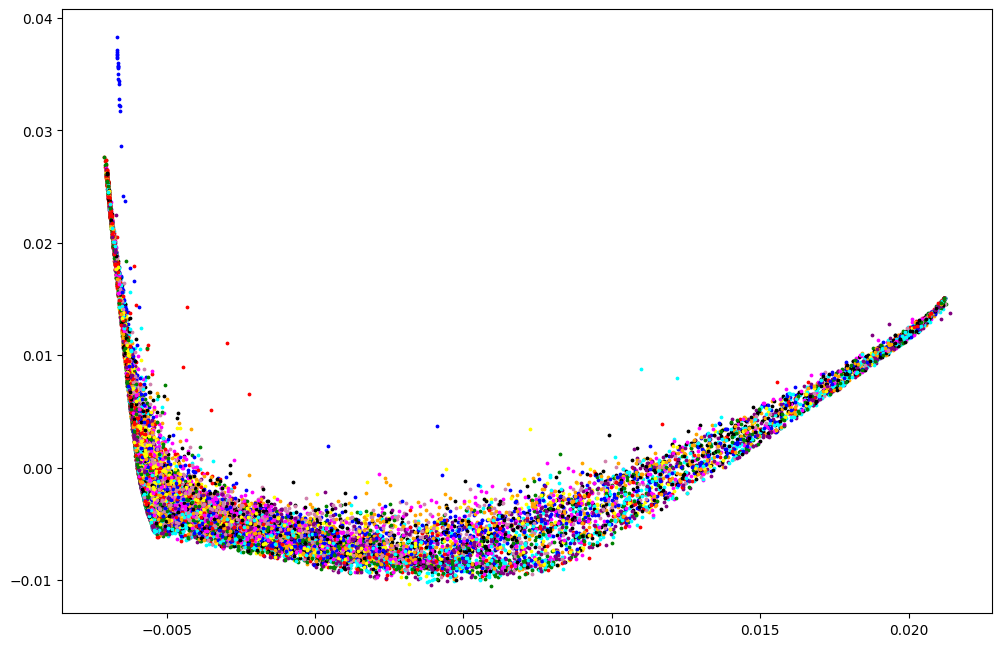

In [ ]:
x_plot = X_train_transformed_lle[0:17000, :][:, 0]
y_plot = X_train_transformed_lle[0:17000, :][:, 1]

for index, (x, y) in enumerate(zip(x_plot, y_plot)):
    plt.scatter(x, y, c=colors[y_train[index]], s=3)
plt.show()

In [ ]:
clustering = SpectralClustering(n_clusters=2,
                                assign_labels='kmeans').fit(X_train_transformed_lle)

In [ ]:
train_acc = accuracy_score(y_train, clustering.labels_)
conf_mat = confusion_matrix(y_train, clustering.labels_)

print(train_acc)
print(conf_mat)

0.11970588235294118
[[1428  268    0    0    0    0    0    0    0    0]
 [1092  607    0    0    0    0    0    0    0    0]
 [1214  530    0    0    0    0    0    0    0    0]
 [1080  638    0    0    0    0    0    0    0    0]
 [1056  655    0    0    0    0    0    0    0    0]
 [1041  568    0    0    0    0    0    0    0    0]
 [ 914  823    0    0    0    0    0    0    0    0]
 [1262  452    0    0    0    0    0    0    0    0]
 [1438  272    0    0    0    0    0    0    0    0]
 [1365  297    0    0    0    0    0    0    0    0]]
